(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

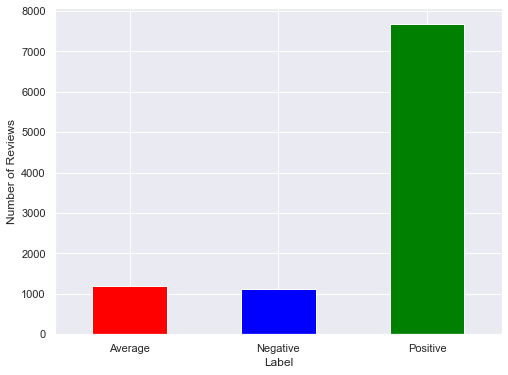

In [44]:
import pandas as pd
import string
from nltk.corpus import stopwords

df = pd.read_csv("C:/Saman Zahid/Liu/Third Semester/Text mining/Project/Project/Datafiniti_Hotel_Reviews_Jun19.csv",encoding='Latin-1', index_col=False)
df = df.iloc[:,[4,6,11,17,19,21]]
df.rename(columns = {"name":"Hotel_Name","reviews.rating":"Rating","reviews.text":"Reviews"},inplace=True)

label = []
nrowsData = df.shape[0]
for f in range(0, nrowsData):
    checkfile = df.iloc[f, 3]
    if checkfile < 3:
        label.append("Negative")
    elif checkfile > 3:
        label.append("Positive")
    else:
        label.append("Average")

df['Label'] = label

num_label = []

for i in range(0,nrowsData):
    if df.loc[i,'Label'] == 'Positive':
        num_label.append(1)
    elif df.loc[i,'Label'] == 'Negative':
        num_label.append(0)
    else:
        num_label.append(2)
df["num_label"] = num_label

import matplotlib.pyplot as plt

fig = plt.figure(figsize= (8,6))
df.groupby('Label').Reviews.count().plot.bar(ylim=0,color = ["red","blue","green"]).set_ylabel("Number of Reviews")
plt.xticks(rotation='horizontal')

In [2]:
stop = stopwords.words('english')
def preprocess(reviews):
    """
    1. Remove all punctuation
    """
    nopunc = [char for char in reviews if char not in string.punctuation]

    nopunc = ''.join(nopunc)

    return nopunc

pre_processed_data = []

for i in df['Reviews']:
    pre_processed_data.append(preprocess(i))

df['_Reviews'] = pre_processed_data

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import numpy as np
## splitting data into test and train
n = np.random.rand(len(df)) < 0.8

## setting predictor and response variables
train = df[n]
test = df[~n]

X_train = train._Reviews
y_train = train.Label

X_test = test._Reviews
y_test = test.Label


vectorizer = CountVectorizer(stop_words=stop)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


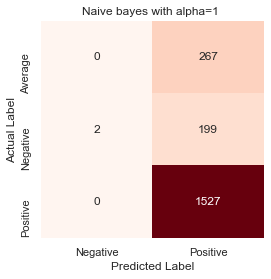

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,f1_score,recall_score
import seaborn as sn

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf,y_train)
y_pred_nb1 = nb_classifier.predict(X_test_counts)

acc_nb1 = accuracy_score(y_test,y_pred_nb1)
prec_nb1 = precision_score(y_test,y_pred_nb1,average='micro')
f1_score_nb1 = f1_score(y_test,y_pred_nb1,average='macro')
recall_score_nb1 = recall_score(y_test,y_pred_nb1,average='macro')
error_rate_nb1 = 1-acc_nb1

#print(acc_nb1,prec_nb1,recall_score_nb1,f1_score_nb1)

data = {'Hotel_Name':test["Hotel_Name"], 'Actual Reviews':y_test, 'Predicted Reviews':y_pred_nb1}
d_nb1 = pd.DataFrame(data)


confusion_matrix = pd.crosstab(d_nb1['Actual Reviews'], d_nb1['Predicted Reviews'], rownames=['Actual'], colnames=['Predicted'])
sn.set(rc={'figure.figsize':(4,4)})
ax = sn.heatmap(confusion_matrix, annot=True,cbar=False,fmt='g',cmap="Reds")
ax.set_title('Naive bayes with alpha=1 ')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')

plt.savefig('nb_1.png')

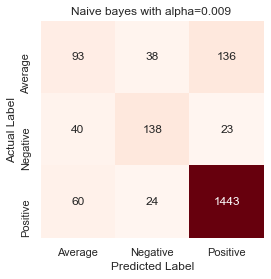

In [7]:
nb_classifier = MultinomialNB(alpha = 0.009)
nb_classifier.fit(X_train_tfidf,y_train)
y_pred_nb2 = nb_classifier.predict(X_test_counts)

acc_nb2 = accuracy_score(y_test,y_pred_nb2)
prec_nb2 = precision_score(y_test,y_pred_nb2,average='macro')
f1_score_nb2 = f1_score(y_test,y_pred_nb2,average='macro')
recall_score_nb2 = recall_score(y_test,y_pred_nb2,average='macro')
error_rate_nb2 = 1-acc_nb2

#print(acc_nb2,prec_nb2,recall_score_nb2,f1_score_nb2)

data = {'Hotel_Name':test["Hotel_Name"], 'Actual Reviews':y_test, 'Predicted Reviews':y_pred_nb2}
d_nb2 = pd.DataFrame(data)


confusion_matrix = pd.crosstab(d_nb2['Actual Reviews'], d_nb2['Predicted Reviews'], rownames=['Actual'], colnames=['Predicted'])
sn.set(rc={'figure.figsize':(4,4)})
ax = sn.heatmap(confusion_matrix, annot=True,cbar=False,fmt='g',cmap="Reds")
ax.set_title('Naive bayes with alpha=0.009 ')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')

plt.savefig('nb_2.png')

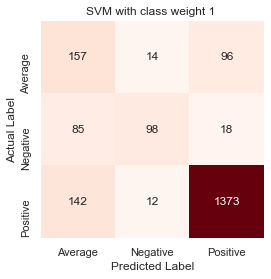

In [16]:
from sklearn.svm import LinearSVC
from sklearn import metrics


svm_classifier = LinearSVC()
svm_classifier.fit(X_train_tfidf,y_train)

y_pred_svm1 = svm_classifier.predict(X_test_counts)


#np.mean(y_pred_svm1 == y_test)
acc_svm1 = accuracy_score(y_test,y_pred_svm1)
prec_svm1 = precision_score(y_test,y_pred_svm1,average='macro')
f1_score_svm1 = f1_score(y_test,y_pred_svm1,average='macro')
recall_score_svm1 = recall_score(y_test,y_pred_svm1,average='macro')
#conf_matrix_svm1 = confusion_matrix(y_test,y_pred_svm1)
error_rate_svm1 = 1-acc_svm1

#a = metrics.classification_report(y_test, y_pred_svm1, target_names=df['Label'].unique()))

data = {'Hotel_Name':test["Hotel_Name"], 'Actual Reviews':y_test, 'Predicted Reviews':y_pred_svm1}
d_svm1 = pd.DataFrame(data)

conf_matrix = pd.crosstab(d_svm1['Actual Reviews'], d_svm1['Predicted Reviews'], rownames=['Actual'], colnames=['Predicted'])

sn.set(rc={'figure.figsize':(4,4)})
ax = sn.heatmap(conf_matrix, annot=True,cbar=False,fmt='g',cmap="Reds")
ax.set_title('SVM with class weight 1 ')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')

plt.savefig('SVM_1.png')

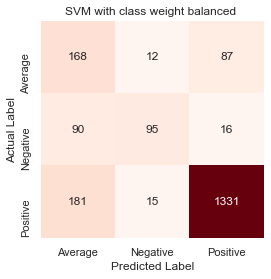

In [17]:
svm_classifier = LinearSVC(class_weight="balanced")
svm_classifier.fit(X_train_tfidf,y_train)

y_pred_svm2 = svm_classifier.predict(X_test_counts)


#np.mean(y_pred_svm1 == y_test)
acc_svm2 = accuracy_score(y_test,y_pred_svm2)
prec_svm2 = precision_score(y_test,y_pred_svm2,average='macro')
f1_score_svm2 = f1_score(y_test,y_pred_svm2,average='macro')
recall_score_svm2 = recall_score(y_test,y_pred_svm2,average='macro')
#conf_matrix_svm2 = confusion_matrix(y_test,y_pred_svm2)
error_rate_svm2 = 1-acc_svm1

#a = metrics.classification_report(y_test, y_pred_svm1, target_names=df['Label'].unique()))

data = {'Hotel_Name':test["Hotel_Name"], 'Actual Reviews':y_test, 'Predicted Reviews':y_pred_svm2}
d_svm2 = pd.DataFrame(data)

conf_matrix = pd.crosstab(d_svm2['Actual Reviews'], d_svm2['Predicted Reviews'], rownames=['Actual'], colnames=['Predicted'])

sn.set(rc={'figure.figsize':(4,4)})
ax = sn.heatmap(conf_matrix, annot=True,cbar=False,fmt='g',cmap="Reds")
ax.set_title('SVM with class weight balanced ')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')

plt.savefig('SVM_2.png')

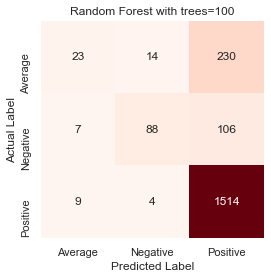

In [10]:
from sklearn.ensemble import RandomForestClassifier


RF_classifier = RandomForestClassifier(n_estimators= 100,bootstrap= True,min_samples_split = 2)
RF_classifier.fit(X_train_tfidf,y_train)
y_predict_RF1 = RF_classifier.predict(X_test_counts)


acc_RF1 = accuracy_score(y_test,y_predict_RF1)
prec_RF1 = precision_score(y_test,y_predict_RF1,average='macro')
f1_score_RF1 = f1_score(y_test,y_predict_RF1,average='macro')
recall_score_RF1 = recall_score(y_test,y_predict_RF1,average='macro')
error_rate_RF1 = 1-acc_RF1


data = {'Hotel_Name':test["Hotel_Name"], 'Actual Reviews':y_test, 'Predicted Reviews':y_predict_RF1}
d_RF1 = pd.DataFrame(data)


confusion_matrix = pd.crosstab(d_RF1['Actual Reviews'], d_RF1['Predicted Reviews'], rownames=['Actual'], colnames=['Predicted'])
sn.set(rc={'figure.figsize':(4,4)})
ax = sn.heatmap(confusion_matrix, annot=True,cbar=False,fmt='g',cmap="Reds")
ax.set_title('Random Forest with trees=100')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')

plt.savefig('RF_1.png')

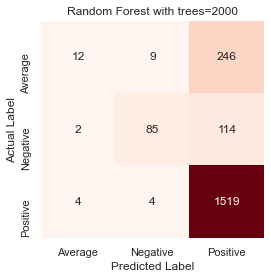

In [11]:
RF_classifier = RandomForestClassifier(n_estimators= 2000,bootstrap= True,min_samples_split = 2)
RF_classifier.fit(X_train_tfidf,y_train)
y_predict_RF2 = RF_classifier.predict(X_test_counts)


acc_RF2 = accuracy_score(y_test,y_predict_RF2)
prec_RF2 = precision_score(y_test,y_predict_RF2,average='macro')
f1_score_RF2 = f1_score(y_test,y_predict_RF2,average='macro')
recall_score_RF2 = recall_score(y_test,y_predict_RF2,average='macro')
error_rate_RF2 = 1-acc_RF2


data = {'Hotel_Name':test["Hotel_Name"], 'Actual Reviews':y_test, 'Predicted Reviews':y_predict_RF2}
d_RF2 = pd.DataFrame(data)


confusion_matrix = pd.crosstab(d_RF2['Actual Reviews'], d_RF2['Predicted Reviews'], rownames=['Actual'], colnames=['Predicted'])
sn.set(rc={'figure.figsize':(4,4)})
ax = sn.heatmap(confusion_matrix, annot=True,cbar=False,fmt='g',cmap="Reds")
ax.set_title('Random Forest with trees=2000')
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')

plt.savefig('RF_2.png')

In [35]:
Precision = [prec_nb1,prec_nb2,prec_svm1,prec_svm2,prec_RF1,prec_RF2]
Accuracy = [acc_nb1,acc_nb2,acc_svm1,acc_svm2,acc_RF1,acc_RF2]
Recall = [recall_score_nb1,recall_score_nb2,recall_score_svm1,recall_score_svm2,recall_score_RF1,recall_score_RF2]
F1_Score = [f1_score_nb1,f1_score_nb2,f1_score_svm1,f1_score_svm2,f1_score_RF1,f1_score_RF2]

Classifiers = ['A',"B","C","D","E","F"]

dd = {'Classifier':Classifiers,'Accuracy':Accuracy,'Precision':Precision, 'Recall':Recall,'F1_Score':F1_Score }
dd = pd.DataFrame(dd)

dd

,Classifier,Accuracy,Precision,Recall,F1_Score
0,A,0.766416,0.766416,0.336650,0.295773
1,B,0.839098,0.690871,0.659957,0.671656
2,C,0.816040,0.707504,0.658242,0.665498
3,D,0.798997,0.696516,0.657831,0.654392
4,E,0.814536,0.746104,0.505147,0.540090
5,F,0.810025,0.780807,0.487530,0.514909


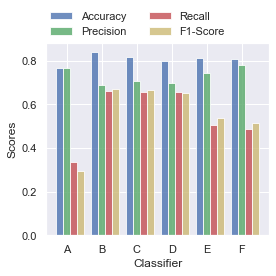

In [39]:
# data to plot
n_groups = 6

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, dd["Accuracy"], bar_width,
alpha=opacity,
color='b',
label='Accuracy')

rects2 = plt.bar(index + bar_width, dd["Precision"], bar_width,
alpha=opacity,
color='g',
label='Precision')

rects1 = plt.bar(index + 2*bar_width, dd["Recall"], bar_width,
alpha=opacity,
color='r',
label='Recall')

rects2 = plt.bar(index + 3*bar_width, dd["F1_Score"], bar_width,
alpha=opacity,
color='y',
label='F1-Score')


plt.xlabel('Classifier')
plt.ylabel('Scores')
#plt.title('Performanc')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D','E','F'))
plt.legend()
ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,borderaxespad=0, frameon=False)

plt.tight_layout()
plt.savefig('Performance_plot.PNG')
plt.show()

In [34]:
len(y_test)

1995